# MPSLIB in Google Colab
This is a simple exmaple of running MPSLIB online in Google Colab

## INSTALL MPSLIB (simple) (only needed once on google colab)

In [13]:
module_name='mpslib'
try:
    __import__(module_name)
    print('%s allready installed. skipping installation.' % module_name)
        
except ImportError:
    if (show_info>0):
        print('%s cannot be loaded. trying to install it.' % module_name)
        !curl -O https://raw.githubusercontent.com/ergosimulation/mpslib/master/install_latest_mpslib.sh
        !sh ./install_latest_mpslib.sh
        

mpslib allready installed. skipping installation.


##INSTALL MPSLIB (only needed once on google colab)

In [0]:
import os

In [15]:
# Get code from GITHUB
!rm -fr mpslib && git clone https://github.com/ergosimulation/mpslib.git
# Compile
os.chdir('/content/mpslib')
#!make

Cloning into 'mpslib'...
remote: Enumerating objects: 360, done.
remote: Counting objects: 100% (360/360), done.
remote: Compressing objects: 100% (258/258), done.
remote: Total 3012 (delta 227), reused 219 (delta 101), pack-reused 2652
Receiving objects: 100% (3012/3012), 23.79 MiB | 25.04 MiB/s, done.
Resolving deltas: 100% (2072/2072), done.


### Install scikit mps (Pyhton interface to MPSlib)

In [4]:
os.chdir('/content/mpslib/scikit-mps')
!pip install -e .

Obtaining file:///content/mpslib/scikit-mps
  Found existing installation: scikit-mps 0.1.0
    Can't uninstall 'scikit-mps'. No files were found to uninstall.
  Running setup.py develop for scikit-mps


### Install vista (for 3D plotting)

In [5]:
!pip install vista

# MPSLIB IN PYTHON

In [1]:
import mpslib as mps
import numpy as np
import matplotlib.pyplot as plt

In [36]:
O = mps.mpslib(method='mps_snesim_tree',
                    n_real = 100, verbose_level=-1)
O.parameter_filename = 'mps_snesim.txt'
O.par['n_cond']=36
O.par['simulation_grid_size']=np.array([50,80,1])

# show parameter setting
O.par


{'n_real': 100,
 'rseed': 1,
 'n_max_cpdf_count': 1,
 'out_folder': '.',
 'ti_fnam': 'ti.dat',
 'simulation_grid_size': array([50, 80,  1]),
 'origin': array([0., 0., 0.]),
 'grid_cell_size': array([1, 1, 1]),
 'mask_fnam': 'mask.dat',
 'hard_data_fnam': 'hard.dat',
 'shuffle_simulation_grid': 2,
 'entropyfactor_simulation_grid': 4,
 'shuffle_ti_grid': 1,
 'hard_data_search_radius': 1,
 'soft_data_categories': array([0, 1]),
 'soft_data_fnam': 'soft.dat',
 'n_threads': -1,
 'debug_level': -1,
 'template_size': array([8, 7, 1]),
 'n_multiple_grids': 3,
 'n_min_node_count': 0,
 'n_cond': 36}

### Load a training image

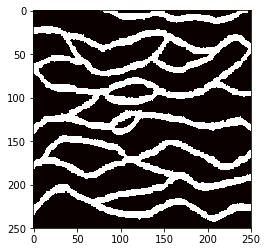

In [37]:
TI, TI_filename = mps.trainingimages.strebelle(di=1, coarse3d=1)
#TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)
#TI, TI_filename = mps.trainingimages.rot90()

plt.imshow(TI[:,:,0].T)

Run MPSLIB

In [43]:
# Set hard data
d_hard = np.array([[ 10, 20, 0, 1],
                    [ 11, 11, 0, 0],
                    [ 22, 11, 0, 1]])
    
# Set soft data
d_soft = np.array([[ 30, 30, 0, 0.1, 0.9],
                    [ 31, 30, 0, 0.1, 0.9],
                    [ 32, 30, 0, 0.1, 0.9]])



parallel: using 52 threads to simulate 100 realizations
parallel: with up to 2 relizations per thread
parallel: Using 50 of max 52 threads
__name__ = mpslib.mpslib
Thread:000, nr=2
Thread:001, nr=2
Thread:002, nr=2
Thread:003, nr=2
Thread:004, nr=2
Thread:005, nr=2
Thread:006, nr=2
Thread:007, nr=2
Thread:008, nr=2
Thread:009, nr=2
Thread:010, nr=2
Thread:011, nr=2
Thread:012, nr=2
Thread:013, nr=2
Thread:014, nr=2
Thread:015, nr=2
Thread:016, nr=2
Thread:017, nr=2
Thread:018, nr=2
Thread:019, nr=2
Thread:020, nr=2
Thread:021, nr=2
Thread:022, nr=2
Thread:023, nr=2
Thread:024, nr=2
Thread:025, nr=2
Thread:026, nr=2
Thread:027, nr=2
Thread:028, nr=2
Thread:029, nr=2
Thread:030, nr=2
Thread:031, nr=2
Thread:032, nr=2
Thread:033, nr=2
Thread:034, nr=2
Thread:035, nr=2
Thread:036, nr=2
Thread:037, nr=2
Thread:038, nr=2
Thread:039, nr=2
Thread:040, nr=2
Thread:041, nr=2
Thread:042, nr=2
Thread:043, nr=2
Thread:044, nr=2
Thread:045, nr=2
Thread:046, nr=2
Thread:047, nr=2
Thread:048, nr=2
Thr

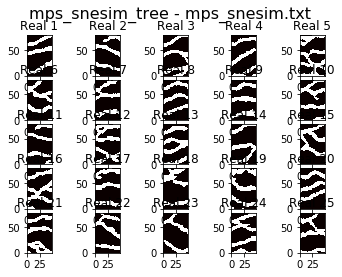

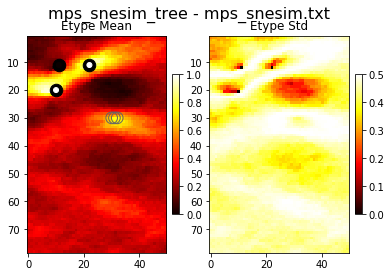

In [44]:
# set hard and soft data
O.delete_local_files()
O.d_hard = d_hard
O.d_soft = d_soft

O.ti = TI
O.run_parallel()
#O.run()

# Plot reals and etype
O.plot_reals()
O.plot_etype()

In [35]:
O

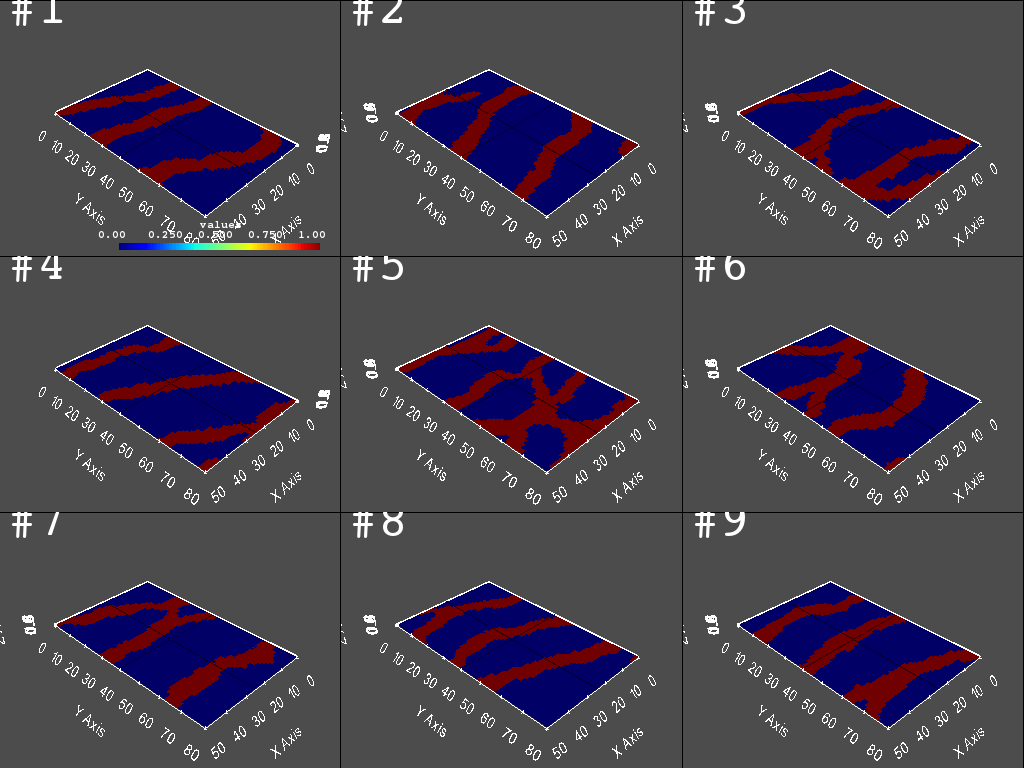

In [45]:
O.plot_reals_3d()